### Importing Libraries

The following code imports essential libraries for data manipulation, numerical operations, and visualization.


This notebook analyzes the relationship between social media usage and mental health using data science techniques. It includes data preprocessing, exploratory data analysis, visualization, and machine learning models to identify patterns and correlations between social media habits and mental health indicators.


In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Data preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, RFE, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Model selection and validation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

### Reading the dataset

In [516]:
df=pd.read_csv("smmh.csv")


Displaying the first few rows of the dataframe to get an overview of the data


In [517]:
df.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


C:\Users\User\AppData\Local\Temp\ipykernel_17564\2865772527.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


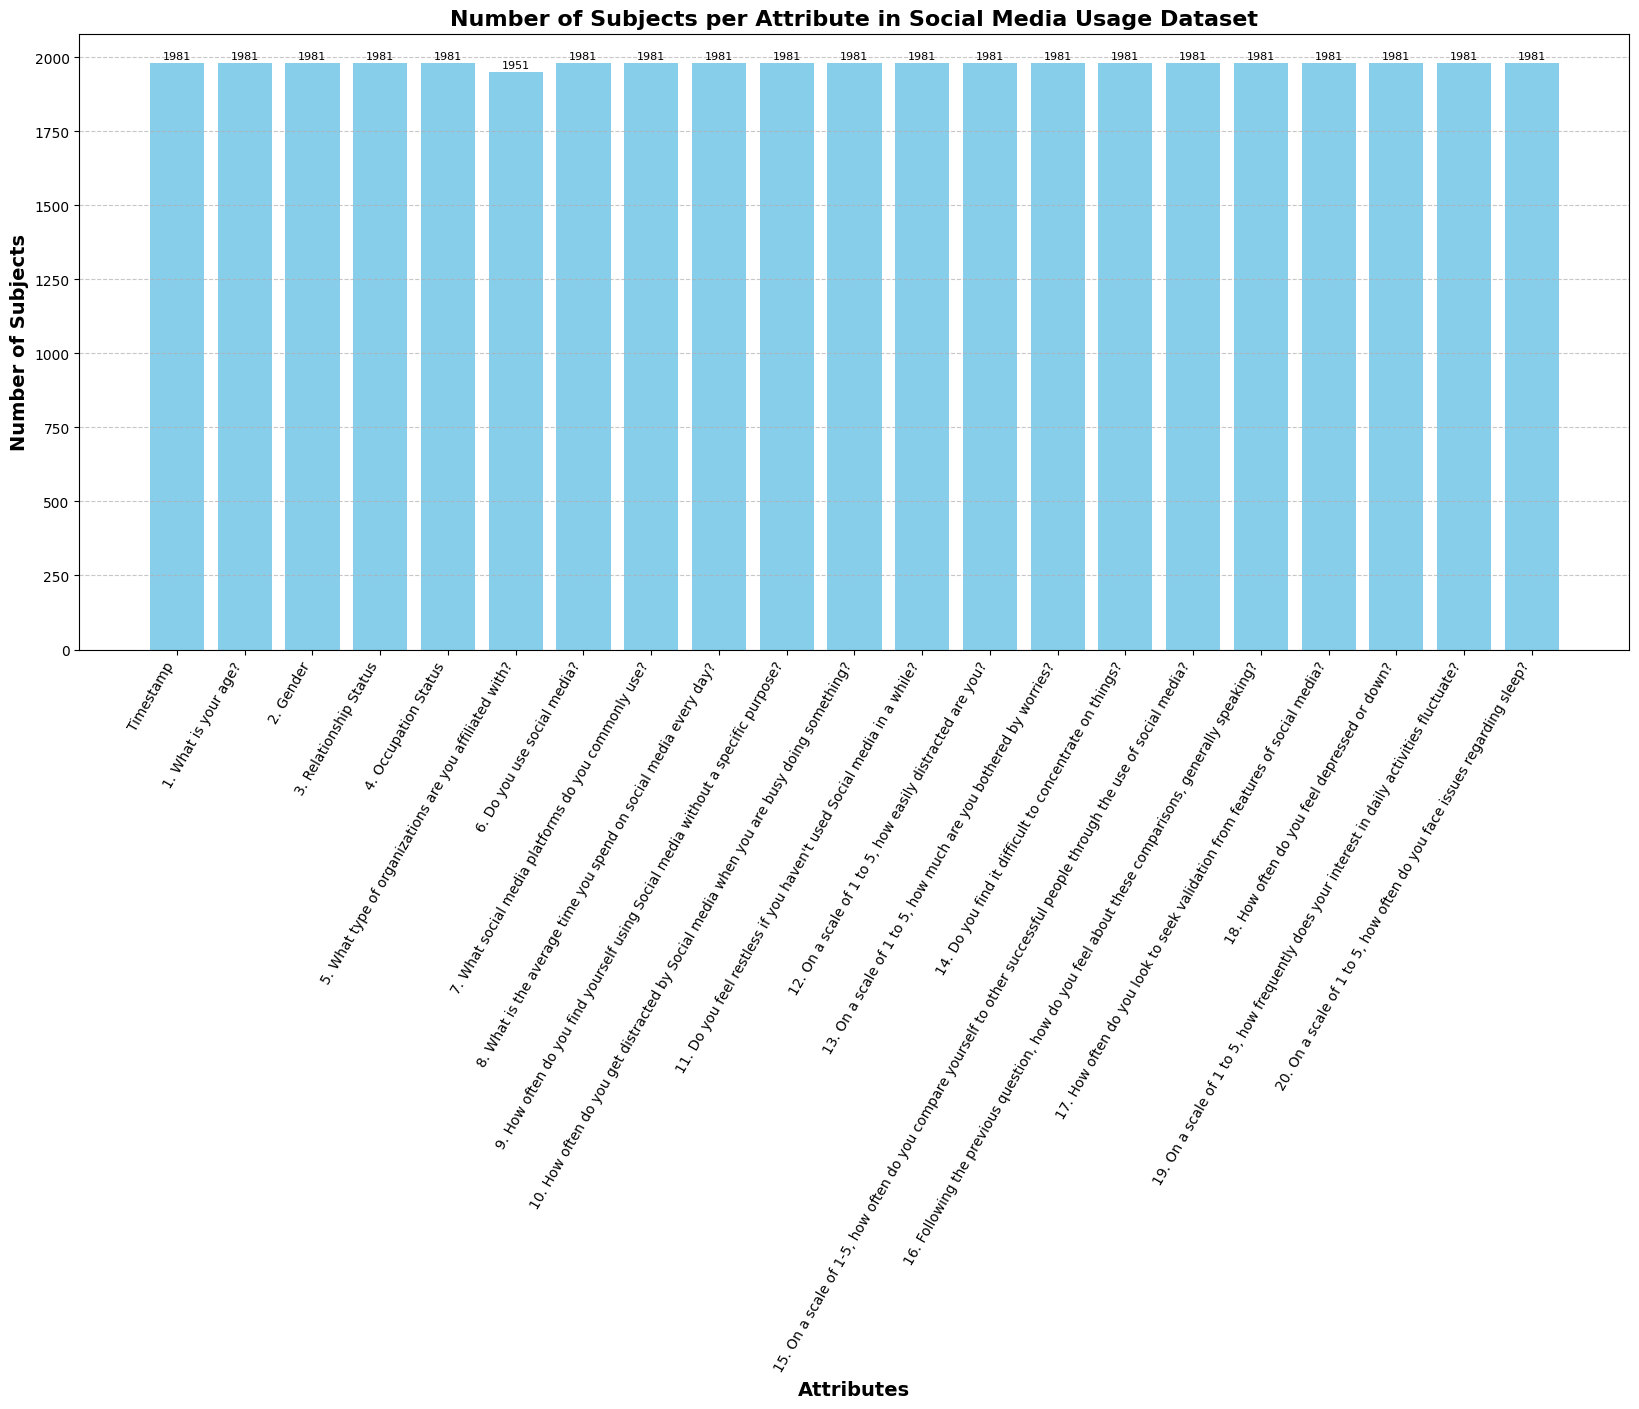

In [518]:
# SMMH Dataset Structure: Number of Subjects per Attribute

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('smmh.csv')

# Count the number of non-null entries for each column
attribute_counts = df.notnull().sum()

# Plotting
plt.figure(figsize=(20, 8))
bars = plt.bar(attribute_counts.index, attribute_counts.values, color='skyblue')

# Adding counts above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, int(yval), ha='center', va='bottom', fontsize=8)

# Customize the plot
plt.xticks(rotation=60, ha='right')
plt.xlabel('Attributes', fontsize=14, weight='bold')
plt.ylabel('Number of Subjects', fontsize=14, weight='bold')
plt.title('Number of Subjects per Attribute in Social Media Usage Dataset', fontsize=16, weight='bold')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


 The following code provides a concise summary of the DataFrame, including the number of non-null entries and the data type of each column.


In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             1981 non-null   object 
 1   1. What is your age?                                                                                                  1981 non-null   float64
 2   2. Gender                                                                                                             1981 non-null   object 
 3   3. Relationship Status                                                                                                1981 non-null   object 
 4   4. Occ

The following code calculates the number of missing values in each column of the DataFrame.


In [520]:
df.isnull().sum()


Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

The following code filters out rows where the  column has null values.


In [521]:
df = df[df["5. What type of organizations are you affiliated with?"].notnull()]


The following code calculates the number of missing values in each column of the DataFrame.


In [522]:
df.isnull().sum()


Timestamp                                                                                                               0
1. What is your age?                                                                                                    0
2. Gender                                                                                                               0
3. Relationship Status                                                                                                  0
4. Occupation Status                                                                                                    0
5. What type of organizations are you affiliated with?                                                                  0
6. Do you use social media?                                                                                             0
7. What social media platforms do you commonly use?                                                                     0
8. What is the average t

The following code drops the  column from the DataFrame.


In [523]:
df=df.drop(columns=["Timestamp"])


In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1951 entries, 0 to 1980
Data columns (total 20 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   1. What is your age?                                                                                                  1951 non-null   float64
 1   2. Gender                                                                                                             1951 non-null   object 
 2   3. Relationship Status                                                                                                1951 non-null   object 
 3   4. Occupation Status                                                                                                  1951 non-null   object 
 4   5. What typ

This section of the code renames the columns of the DataFrame to more concise and readable names.



In [525]:
column_names = {
    "1. What is your age?": "Age",
    "2. Gender": "Gender",
    "3. Relationship Status": "Relationship_Status",
    "4. Occupation Status": "Occupation_Status",
    "5. What type of organizations are you affiliated with?": "Affiliation_Type",
    "6. Do you use social media?": "Uses_Social_Media",
    "7. What social media platforms do you commonly use?": "Common_Platforms",
    "8. What is the average time you spend on social media every day?": "Daily_SM_Usage",
    "9. How often do you find yourself using Social media without a specific purpose?": "SM_Usage_Without_Purpose",
    "10. How often do you get distracted by Social media when you are busy doing something?": "SM_Distraction",
    "11. Do you feel restless if you haven't used Social media in a while?": "Restless_Without_SM",
    "12. On a scale of 1 to 5, how easily distracted are you?": "Easily_Distracted",
    "13. On a scale of 1 to 5, how much are you bothered by worries?": "Bothered_By_Worries",
    "14. Do you find it difficult to concentrate on things?": "Difficulty_Concentrating",
    "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?": "Comparison_On_SM",
    "16. Following the previous question, how do you feel about these comparisons, generally speaking?": "Feelings_About_Comparison",
    "17. How often do you look to seek validation from features of social media?": "Seeking_Validation_SM",
    "18. How often do you feel depressed or down?": "Depression_Frequency",
    "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?": "Interest_Fluctuation",
    "20. On a scale of 1 to 5, how often do you face issues regarding sleep?": "Sleep_Issues"
}

df.rename(columns=column_names, inplace=True)

df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 1951 entries, 0 to 1980
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1951 non-null   float64
 1   Gender                     1951 non-null   object 
 2   Relationship_Status        1951 non-null   object 
 3   Occupation_Status          1951 non-null   object 
 4   Affiliation_Type           1951 non-null   object 
 5   Uses_Social_Media          1951 non-null   object 
 6   Common_Platforms           1951 non-null   object 
 7   Daily_SM_Usage             1951 non-null   object 
 8   SM_Usage_Without_Purpose   1951 non-null   int64  
 9   SM_Distraction             1951 non-null   int64  
 10  Restless_Without_SM        1951 non-null   int64  
 11  Easily_Distracted          1951 non-null   int64  
 12  Bothered_By_Worries        1951 non-null   int64  
 13  Difficulty_Concentrating   1951 non-null   int64  
 1

In [526]:
# Clean gender values to categories Male/Female/Other
if 'Gender' in df.columns:
    _df_gender = df['Gender'].astype(str).str.strip().str.lower()
    conditions = [
        _df_gender.str.contains('male', na=False),
        _df_gender.str.contains('female', na=False)
    ]
    choices = ['Male', 'Female']
    df['Gender_Clean'] = np.select(conditions, choices, default='Other')
else:
    print("Warning: 'Gender' column not found in the DataFrame.")

# Map usage to ordered categories and minutes midpoints
usage_order = [
    'Less than an Hour',
    'Between 1 and 2 hours',
    'Between 2 and 3 hours',
    'Between 3 and 4 hours',
    'Between 4 and 5 hours',
    'More than 5 hours'
]
usage_to_minutes = {
    'Less than an Hour': 30,
    'Between 1 and 2 hours': 90,
    'Between 2 and 3 hours': 150,
    'Between 3 and 4 hours': 210,
    'Between 4 and 5 hours': 270,
    'More than 5 hours': 330
}

# Normalize usage strings (strip)
if 'Daily_SM_Usage' in df.columns:
    df['Daily_SM_Usage'] = df['Daily_SM_Usage'].astype(str).str.strip()
    df['Usage_Category'] = pd.Categorical(df['Daily_SM_Usage'], categories=usage_order, ordered=True)
    df['Usage_Minutes'] = df['Daily_SM_Usage'].map(usage_to_minutes)
else:
    print("Warning: 'Daily_SM_Usage' column not found in the DataFrame.")

# One-hot platforms
if 'Common_Platforms' in df.columns:
    platforms_series = df['Common_Platforms'].fillna('').astype(str)
    # Split by comma and normalize spacing/case
    platforms_list = platforms_series.apply(lambda s: [p.strip() for p in s.split(',') if p.strip()])
    all_platforms = sorted({p for sub in platforms_list for p in sub})
    for p in all_platforms:
        df[f'PLAT_{p}'] = platforms_list.apply(lambda lst: 1 if p in lst else 0)

    # Compute per-respondent platform count to later convert to percent if needed
    plat_cols = [c for c in df.columns if c.startswith('PLAT_')]
    df['Platform_Count'] = df[plat_cols].sum(axis=1).replace(0, np.nan)

    # For percentage per respondent: share of selected platforms
    for c in plat_cols:
        df[c + '_pct'] = (df[c] / df['Platform_Count']) * 100
else:
    print("Warning: 'Common_Platforms' column not found in the DataFrame.")

print('Prepared columns:', 'Gender_Clean, Usage_Category, Usage_Minutes,', len(plat_cols), 'platforms')


Prepared columns: Gender_Clean, Usage_Category, Usage_Minutes, 9 platforms


In [527]:
# 1) Relationship Status vs Number of Respondents (Bar)
plt.figure(figsize=(8,5))
col_rel = '3. Relationship Status'  # Corrected column name
if col_rel in df.columns:
    ax = sns.countplot(data=df, x=col_rel, order=df[col_rel].value_counts().index, palette='Set2')
    plt.xticks(rotation=30, ha='right')
    plt.title('Number of Respondents by Relationship Status')
    plt.xlabel('Relationship Status')
    plt.ylabel('Number of Respondents')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords='offset points')
    plt.tight_layout()
    plt.show()
else:
    print(f"Warning: '{col_rel}' column not found in the DataFrame.")


<Figure size 800x500 with 0 Axes>

In [528]:
# 2) Occupation Status vs Number of Respondents (Bar)
plt.figure(figsize=(10,5))
col_occ = '4. Occupation Status'  # Corrected column name
if col_occ in df.columns:
    ax = sns.countplot(data=df, x=col_occ, order=df[col_occ].value_counts().index, palette='Set3')
    plt.xticks(rotation=30, ha='right')
    plt.title('Number of Respondents by Occupation Status')
    plt.xlabel('Occupation Status')
    plt.ylabel('Number of Respondents')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords='offset points')
    plt.tight_layout()
    plt.show()
else:
    print(f"Warning: '{col_occ}' column not found in the DataFrame.")


<Figure size 1000x500 with 0 Axes>

In [529]:
# 3) Relationship distribution and quick insights
plt.figure(figsize=(8,5))
if col_rel in df.columns:
    ax = sns.countplot(data=df, x=col_rel, order=df[col_rel].value_counts().index, palette='Set2')
    plt.xticks(rotation=25, ha='right')
    plt.xlabel('Relationship Status')
    plt.ylabel('Number of Respondents')
    plt.title('Distribution of Relationship Status')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords='offset points')
    plt.tight_layout()
    plt.show()

    # Insights
    counts = df[col_rel].value_counts(dropna=False)
    perc = (counts / len(df) * 100).round(1)
    print('Relationship status counts:')
    print(counts)
    print('\nRelationship status percentages:')
    print(perc)

    # Optional: relationship by gender (stacked %)
    if 'Gender_Clean' in df.columns:
        rel_gender = (
            df[df['Gender_Clean'].isin(['Male','Female'])]
              .groupby(['Gender_Clean', col_rel])
              .size()
              .groupby(level=0)
              .apply(lambda s: s / s.sum() * 100)
              .reset_index(name='Percent')
        )
        plt.figure(figsize=(9,5))
        sns.barplot(data=rel_gender, x=col_rel, y='Percent', hue='Gender_Clean', palette='Pastel2')
        plt.xticks(rotation=25, ha='right')
        plt.ylabel('Percent within gender')
        plt.title('Relationship Status by Gender (%)')
        plt.tight_layout()
        plt.show()
    else:
        print("Warning: 'Gender_Clean' column not found in the DataFrame.")
else:
    print(f"Warning: '{col_rel}' column not found in the DataFrame.")


<Figure size 800x500 with 0 Axes>

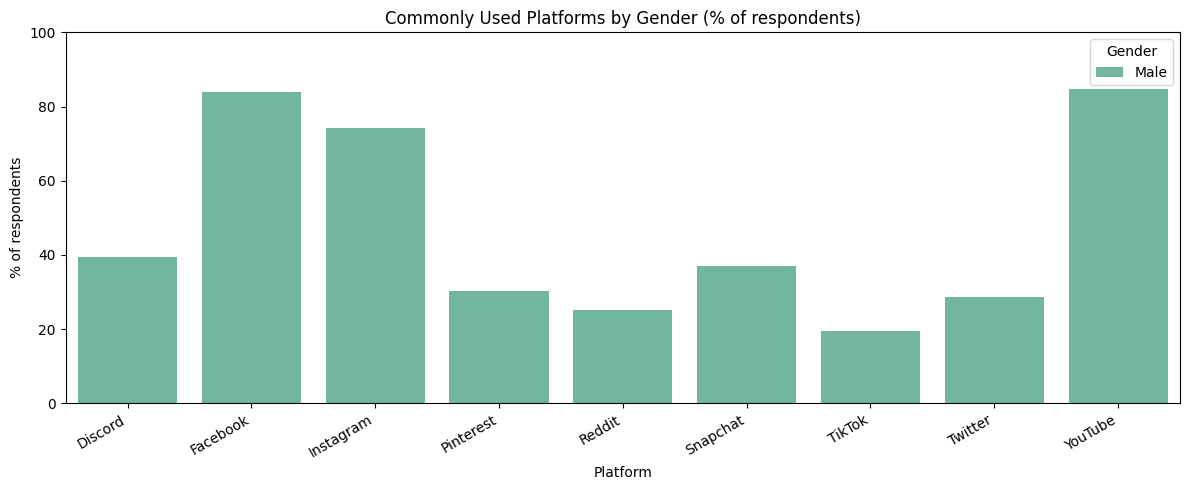

In [530]:
# 1) Commonly used platforms by respondents (Male vs Female) - Percent bars
# Compute percent of respondents selecting each platform within gender

# Check if 'Gender_Clean' column exists in the DataFrame
if 'Gender_Clean' not in df.columns:
    # Attempt to create 'Gender_Clean' column if it doesn't exist
    if 'Gender' in df.columns:
        df['Gender_Clean'] = df['Gender'].str.strip().str.capitalize()
    else:
        print("Error: Neither 'Gender_Clean' nor 'Gender' column found in the DataFrame.")
else:
    mf_df = df[df['Gender_Clean'].isin(['Male','Female'])].copy()
    plat_cols = [c for c in df.columns if c.startswith('PLAT_') and not c.endswith('_pct')]

    summary = []
    for pcol in plat_cols:
        platform = pcol[len('PLAT_'):]
        for gender, gdata in mf_df.groupby('Gender_Clean'):
            num = gdata[pcol].sum()
            denom = len(gdata)
            pct = 100 * num / denom if denom else np.nan
            summary.append({'Platform': platform, 'Gender': gender, 'Percent': pct})
    platform_pct = pd.DataFrame(summary)

    plt.figure(figsize=(12,5))
    sns.barplot(data=platform_pct, x='Platform', y='Percent', hue='Gender', palette='Set2')
    plt.xticks(rotation=30, ha='right')
    plt.title('Commonly Used Platforms by Gender (% of respondents)')
    plt.ylabel('% of respondents')
    plt.xlabel('Platform')
    plt.ylim(0, 100)
    plt.legend(title='Gender')
    plt.tight_layout()
    plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_17564\32258609.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Usage_Category', order=order, palette='Blues')


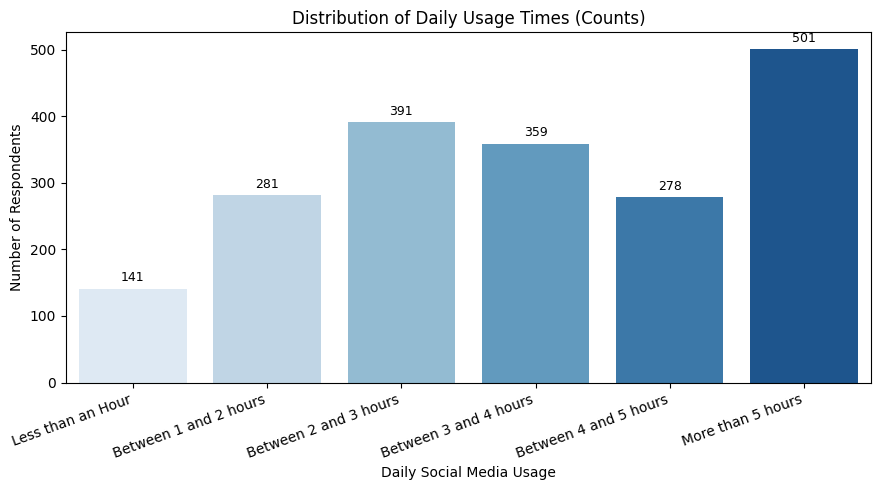

In [531]:
# 2) Distribution of Daily Social Media Usage Times with Number of Respondents
plt.figure(figsize=(9,5))
order = [
    'Less than an Hour',
    'Between 1 and 2 hours',
    'Between 2 and 3 hours',
    'Between 3 and 4 hours',
    'Between 4 and 5 hours',
    'More than 5 hours'
]
ax = sns.countplot(data=df, x='Usage_Category', order=order, palette='Blues')
plt.xticks(rotation=20, ha='right')
plt.xlabel('Daily Social Media Usage')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Daily Usage Times (Counts)')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords='offset points')
plt.tight_layout()
plt.show()


This section of the code imports the necessary libraries for data visualization to find out the outliers



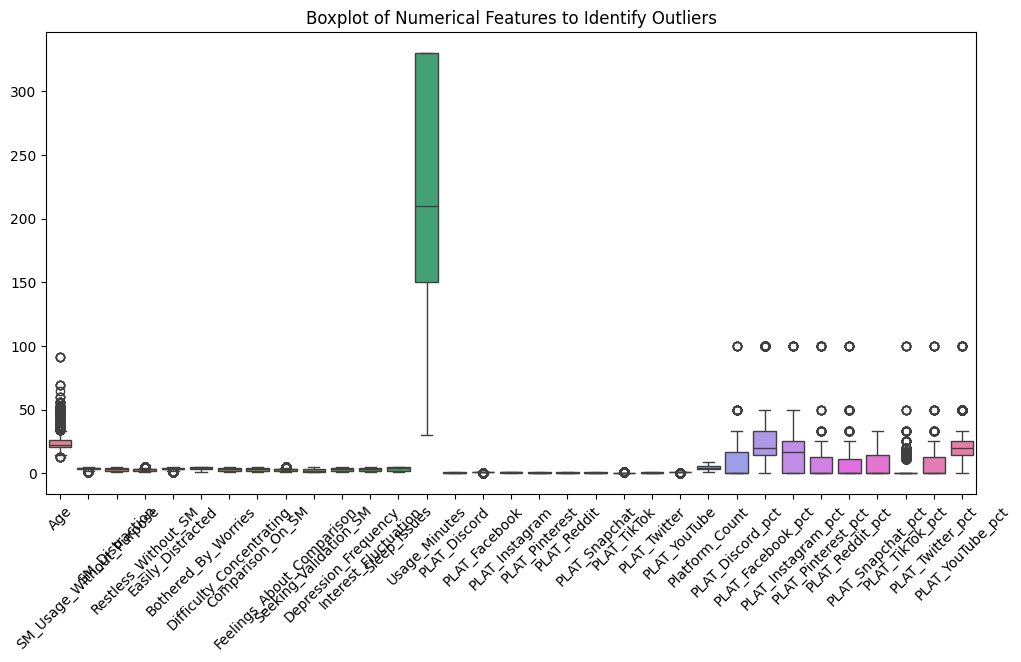

In [532]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing outliers using boxplot for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features to Identify Outliers')
plt.xticks(rotation=45)
plt.show()


 This section of the code performs One Hot Encoding on categorical variables in the dataset.
 One Hot Encoding converts categorical variables into a form that could be provided to machine learning algorithms to improve predictions.
 The process creates binary columns for each category in the categorical variables, which helps in:
 1. Avoiding ordinal relationships between categories
 2. Making the model more interpretable
 3. Improving model performance for certain algorithms that require numerical input


In [533]:
# Perform One Hot Encoding for categorical columns
# First, identify categorical columns that need encoding
categorical_columns = [
    'Gender', 'Relationship_Status', 'Occupation_Status', 'Affiliation_Type',
    'Uses_Social_Media', 'Common_Platforms', 'Daily_SM_Usage'
]

# Create a copy of the dataframe before encoding
df_encoded = df.copy()

# Apply one-hot encoding using pandas get_dummies
for column in categorical_columns:
    if column in df_encoded.columns:
        # Create dummies and drop the original column
        dummies = pd.get_dummies(df_encoded[column], prefix=column, drop_first=False)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded.drop(column, axis=1, inplace=True)

# Display the shape of the dataframe before and after encoding
print(f"Original dataframe shape: {df.shape}")
print(f"Encoded dataframe shape: {df_encoded.shape}")

# Display the first few rows of the encoded dataframe
df_encoded.head()


Original dataframe shape: (1951, 42)
Encoded dataframe shape: (1951, 203)


,Age,SM_Usage_Without_Purpose,SM_Distraction,Restless_Without_SM,Easily_Distracted,Bothered_By_Worries,Difficulty_Concentrating,Comparison_On_SM,Feelings_About_Comparison,Seeking_Validation_SM,...,"Common_Platforms_YouTube, Pinterest","Common_Platforms_YouTube, Reddit","Common_Platforms_YouTube, Snapchat, Discord","Common_Platforms_YouTube, Snapchat, Discord, Reddit",Daily_SM_Usage_Between 1 and 2 hours,Daily_SM_Usage_Between 2 and 3 hours,Daily_SM_Usage_Between 3 and 4 hours,Daily_SM_Usage_Between 4 and 5 hours,Daily_SM_Usage_Less than an Hour,Daily_SM_Usage_More than 5 hours
0,21.0,5,3,2,5,2,5,2,3,2,...,False,False,False,False,False,True,False,False,False,False
1,21.0,4,3,2,4,5,4,5,1,1,...,False,False,False,False,False,False,False,False,False,True
2,21.0,3,2,1,2,5,4,3,3,1,...,False,False,False,False,False,False,True,False,False,False
3,21.0,4,2,1,3,5,3,5,1,2,...,False,False,False,False,False,False,False,False,False,True
4,21.0,3,5,4,4,5,5,3,3,3,...,False,False,False,False,False,True,False,False,False,False


This file contains code for analyzing and processing data related to social media addiction and mental health.


In [534]:
df=df_encoded


In [535]:
df

,Age,SM_Usage_Without_Purpose,SM_Distraction,Restless_Without_SM,Easily_Distracted,Bothered_By_Worries,Difficulty_Concentrating,Comparison_On_SM,Feelings_About_Comparison,Seeking_Validation_SM,...,"Common_Platforms_YouTube, Pinterest","Common_Platforms_YouTube, Reddit","Common_Platforms_YouTube, Snapchat, Discord","Common_Platforms_YouTube, Snapchat, Discord, Reddit",Daily_SM_Usage_Between 1 and 2 hours,Daily_SM_Usage_Between 2 and 3 hours,Daily_SM_Usage_Between 3 and 4 hours,Daily_SM_Usage_Between 4 and 5 hours,Daily_SM_Usage_Less than an Hour,Daily_SM_Usage_More than 5 hours
0,21.0,5,3,2,5,2,5,2,3,2,...,False,False,False,False,False,True,False,False,False,False
1,21.0,4,3,2,4,5,4,5,1,1,...,False,False,False,False,False,False,False,False,False,True
2,21.0,3,2,1,2,5,4,3,3,1,...,False,False,False,False,False,False,True,False,False,False
3,21.0,4,2,1,3,5,3,5,1,2,...,False,False,False,False,False,False,False,False,False,True
4,21.0,3,5,4,4,5,5,3,3,3,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,35.0,4,2,4,3,5,3,4,1,3,...,False,False,False,False,True,False,False,False,False,False
1977,19.0,4,5,5,5,3,5,2,3,2,...,False,False,False,False,False,False,False,False,True,False
1978,22.0,2,4,3,3,4,2,1,4,3,...,False,False,False,False,True,False,False,False,False,False
1979,23.0,3,1,1,5,5,5,2,5,1,...,False,False,False,False,False,False,False,False,False,True


In [536]:
df.isnull().sum()


Age                                     0
SM_Usage_Without_Purpose                0
SM_Distraction                          0
Restless_Without_SM                     0
Easily_Distracted                       0
                                       ..
Daily_SM_Usage_Between 2 and 3 hours    0
Daily_SM_Usage_Between 3 and 4 hours    0
Daily_SM_Usage_Between 4 and 5 hours    0
Daily_SM_Usage_Less than an Hour        0
Daily_SM_Usage_More than 5 hours        0
Length: 203, dtype: int64


 Data Preprocessing and Feature Engineering
 This section focuses on converting boolean values to numerical format (0/1)
 to prepare the data for machine learning models. Boolean columns are identified
 and converted to integers, which makes them suitable for mathematical operations
 and model training. This step is essential for ensuring all data is in a numeric
 format that can be processed by machine learning algorithms.


In [537]:
# Convert boolean data values to numerical values
# This will convert True to 1 and False to 0

# First, identify boolean columns
bool_columns = df.select_dtypes(include=['bool']).columns

# Display the number of boolean columns found
print(f"Number of boolean columns found: {len(bool_columns)}")

# Convert boolean columns to integers (True becomes 1, False becomes 0)
for column in bool_columns:
    df[column] = df[column].astype(int)

# Verify the conversion by checking data types
print("\nData types after conversion:")
print(df.dtypes.value_counts())

# Display a sample of the converted data
print("\nSample of data after boolean conversion:")
print(df.head(3))


Number of boolean columns found: 168

Data types after conversion:
int64       191
float64      10
object        1
category      1
Name: count, dtype: int64

Sample of data after boolean conversion:
    Age  SM_Usage_Without_Purpose  SM_Distraction  Restless_Without_SM  \
0  21.0                         5               3                    2   
1  21.0                         4               3                    2   
2  21.0                         3               2                    1   

   Easily_Distracted  Bothered_By_Worries  Difficulty_Concentrating  \
0                  5                    2                         5   
1                  4                    5                         4   
2                  2                    5                         4   

   Comparison_On_SM  Feelings_About_Comparison  Seeking_Validation_SM  ...  \
0                 2                          3                      2  ...   
1                 5                          1                 

 Mental Health Status Classification
 
 This section focuses on creating a mental health status classification based on various psychological and behavioral indicators.
 We define a set of mental health features including worry levels, concentration difficulties, depression symptoms, 
 social media usage patterns, and validation-seeking behaviors.
 
 The classification system categorizes individuals into five mental health status levels:
 - Mild: Average score ≤ 1.5
 - Minimal Moderate: Average score between 1.5 and 2.5
 - Moderate: Average score between 2.5 and 3.5
 - Severe: Average score between 3.5 and 4.5
 - Extremely Severe: Average score > 4.5
 
 This classification will help identify individuals who may be experiencing mental health issues
 related to social media usage and provide insights for targeted interventions.


In [538]:
df.describe()

,Age,SM_Usage_Without_Purpose,SM_Distraction,Restless_Without_SM,Easily_Distracted,Bothered_By_Worries,Difficulty_Concentrating,Comparison_On_SM,Feelings_About_Comparison,Seeking_Validation_SM,...,"Common_Platforms_YouTube, Pinterest","Common_Platforms_YouTube, Reddit","Common_Platforms_YouTube, Snapchat, Discord","Common_Platforms_YouTube, Snapchat, Discord, Reddit",Daily_SM_Usage_Between 1 and 2 hours,Daily_SM_Usage_Between 2 and 3 hours,Daily_SM_Usage_Between 3 and 4 hours,Daily_SM_Usage_Between 4 and 5 hours,Daily_SM_Usage_Less than an Hour,Daily_SM_Usage_More than 5 hours
count,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,...,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.00000,1951.000000,1951.000000,1951.000000,1951.000000
mean,25.941107,3.558688,3.334700,2.620195,3.355715,3.502819,3.283957,2.839057,2.712968,2.438749,...,0.000513,0.008201,0.002050,0.001025,0.144029,0.20041,0.184008,0.142491,0.072271,0.256791
std,9.568637,1.128428,1.334059,1.246033,1.190375,1.291339,1.324849,1.397702,1.062475,1.233804,...,0.022640,0.090210,0.045245,0.032009,0.351209,0.40041,0.387590,0.349643,0.259002,0.436975
min,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,26.000000,4.000000,4.500000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
max,91.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


## # For Starters, let's understand the distribution of data for participants and their time spent on Social media


Distribution of Mental Status categories:
Mental_Status
Moderate            1176
Severe               562
Minimal Moderate     172
Extremely Severe      22
Mild                  19
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_17564\3468465011.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Mental_Status'] = df.apply(calculate_mental_status, axis=1)


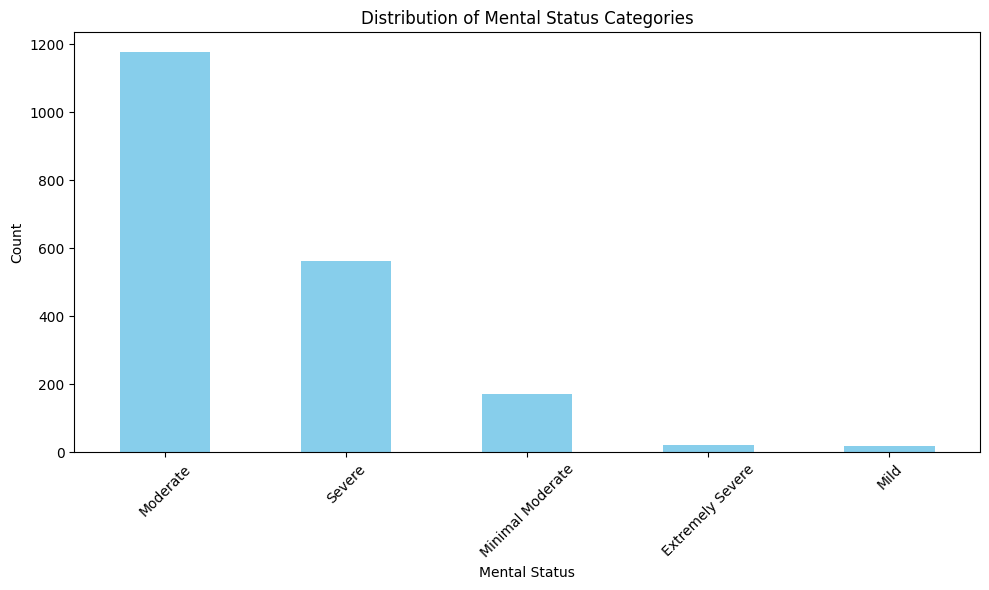


Correlation between Mental_Status and key features:
- Bothered_By_Worries: 0.3746
- Difficulty_Concentrating: 0.4606
- Interest_Fluctuation: 0.4063
- Sleep_Issues: 0.4109
- SM_Usage_Without_Purpose: 0.3683
- SM_Distraction: 0.4348
- Restless_Without_SM: 0.3950
- Easily_Distracted: 0.4419


C:\Users\User\AppData\Local\Temp\ipykernel_17564\3468465011.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Mental_Status_Numeric'] = df['Mental_Status'].map(status_mapping)


In [539]:
# Feature Engineering: Create Mental Status column based on relevant features

# Define the features that contribute to mental status assessment
mental_health_features = [
    'Bothered_By_Worries', 
    'Difficulty_Concentrating', 
    'Depressed_Or_Down', 
    'Interest_Fluctuation', 
    'Sleep_Issues',
    'SM_Usage_Without_Purpose',
    'SM_Distraction',
    'Restless_Without_SM',
    'Easily_Distracted',
    'Social_Media_Comparison',
    'Negative_Comparison_Feelings',
    'Validation_Seeking'
]

# Create a function to calculate mental status score
def calculate_mental_status(row):
    # Extract relevant features that exist in the dataframe
    valid_features = [f for f in mental_health_features if f in row.index]
    
    if not valid_features:
        return "Unknown"  # No relevant features found
    
    # Calculate the average score from available features
    total_score = sum(row[feature] for feature in valid_features)
    avg_score = total_score / len(valid_features)
    
    # Classify based on average score
    if avg_score <= 1.5:
        return "Mild"
    elif avg_score <= 2.5:
        return "Minimal Moderate"
    elif avg_score <= 3.5:
        return "Moderate"
    elif avg_score <= 4.5:
        return "Severe"
    else:
        return "Extremely Severe"

# Apply the function to create the new column
df['Mental_Status'] = df.apply(calculate_mental_status, axis=1)

# Display the distribution of mental status categories
mental_status_counts = df['Mental_Status'].value_counts()
print("\nDistribution of Mental Status categories:")
print(mental_status_counts)

# Visualize the distribution
plt.figure(figsize=(10, 6))
mental_status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Mental Status Categories')
plt.xlabel('Mental Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check correlation between Mental_Status and other key features
print("\nCorrelation between Mental_Status and key features:")
# Convert Mental_Status to numeric for correlation analysis
status_mapping = {
    'Mild': 1, 
    'Minimal Moderate': 2, 
    'Moderate': 3, 
    'Severe': 4, 
    'Extremely Severe': 5
}
df['Mental_Status_Numeric'] = df['Mental_Status'].map(status_mapping)

# Calculate correlations with key features
for feature in [f for f in mental_health_features if f in df.columns]:
    correlation = df['Mental_Status_Numeric'].corr(df[feature])
    print(f"- {feature}: {correlation:.4f}")


 Feature Correlation Analysis with Mental Health Status
 
 This section analyzes the correlation between various features and the mental health status of respondents.
 We calculate the correlation coefficient between each feature and the Mental_Status_Numeric variable,
 which represents the severity of mental health issues on a scale from 1 (Mild) to 5 (Extremely Severe).
 
 The visualization shows the top 15 features that have the strongest correlation (positive or negative)
 with mental health status, helping us identify which factors might be most associated with
 mental health outcomes in relation to social media usage.


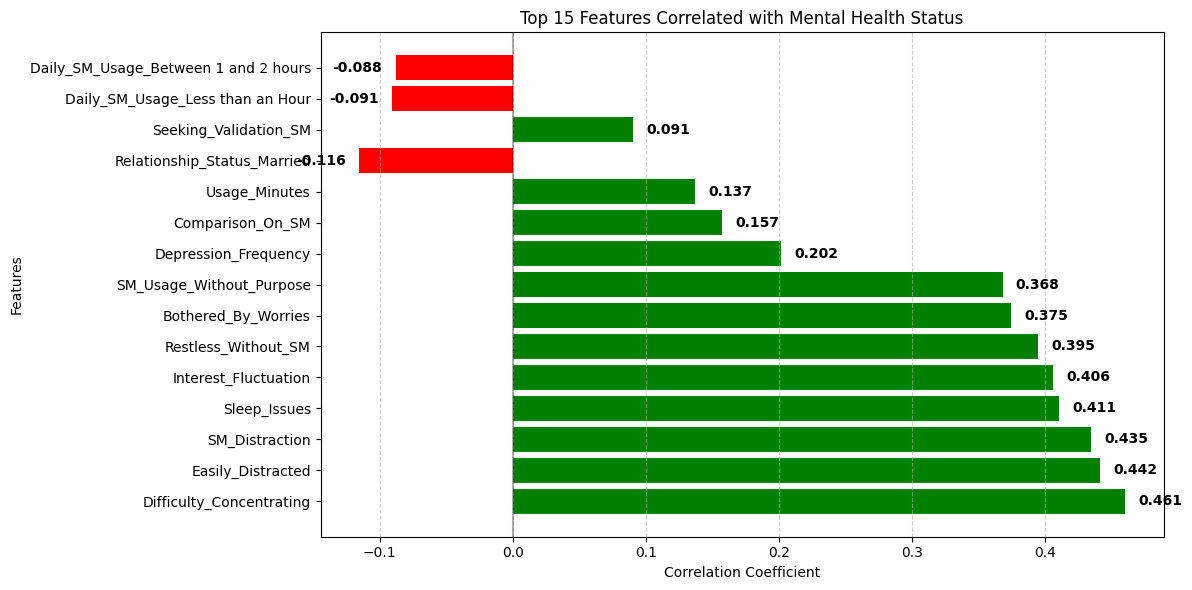


Top 15 features correlated with Mental Health Status:
                                  Feature  Correlation
6                Difficulty_Concentrating     0.460620
4                       Easily_Distracted     0.441855
2                          SM_Distraction     0.434825
12                           Sleep_Issues     0.410940
11                   Interest_Fluctuation     0.406291
3                     Restless_Without_SM     0.394957
5                     Bothered_By_Worries     0.374649
1                SM_Usage_Without_Purpose     0.368293
10                   Depression_Frequency     0.201881
7                        Comparison_On_SM     0.157369
13                          Usage_Minutes     0.137389
44            Relationship_Status_Married    -0.115667
9                   Seeking_Validation_SM     0.090670
199      Daily_SM_Usage_Less than an Hour    -0.090568
195  Daily_SM_Usage_Between 1 and 2 hours    -0.088024


In [540]:
# Calculate correlations between Mental_Status_Numeric and all other features
correlations = {}
for column in df.columns:
    if column not in ['Mental_Status', 'Mental_Status_Numeric']:
        try:
            corr = df['Mental_Status_Numeric'].corr(df[column])
            if not pd.isna(corr):  # Only include non-NaN correlations
                correlations[column] = corr
        except:
            continue

# Convert to DataFrame and sort by absolute correlation value
corr_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values('Abs_Correlation', ascending=False)

# Get top 15 features with highest correlation (absolute value)
top_features = corr_df.head(15).copy()

# Create a horizontal bar chart for top correlated features
plt.figure(figsize=(12, 6))
colors = ['red' if x < 0 else 'green' for x in top_features['Correlation']]
bars = plt.barh(top_features['Feature'], top_features['Correlation'], color=colors)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Top 15 Features Correlated with Mental Health Status')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add correlation values at the end of each bar
for i, bar in enumerate(bars):
    value = top_features['Correlation'].iloc[i]
    plt.text(value + (0.01 if value >= 0 else -0.01), 
             bar.get_y() + bar.get_height()/2, 
             f'{value:.3f}', 
             va='center', 
             ha='left' if value >= 0 else 'right',
             fontweight='bold')

plt.tight_layout()
plt.show()

# Drop the temporary column used for sorting
corr_df = corr_df.drop('Abs_Correlation', axis=1)

# Display top correlations
print("\nTop 15 features correlated with Mental Health Status:")
print(corr_df.head(15))


 This section of the code is responsible for creating a DataFrame with specific features and visualizing their distributions.
 It selects 'Age', 'Daily_SM_Usage_Less than an Hour', and 'Occupation_Status_Salaried Worker' from the DataFrame.
 The code then generates a figure with three subplots: a histogram for age distribution, and count plots for the other two features.
 Each subplot is customized with titles, labels, and colors to enhance readability and interpretation.


C:\Users\User\AppData\Local\Temp\ipykernel_17564\99807440.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Daily_SM_Usage_Less than an Hour', data=plot_df, palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_17564\99807440.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Occupation_Status_Salaried Worker', data=plot_df, palette='magma')


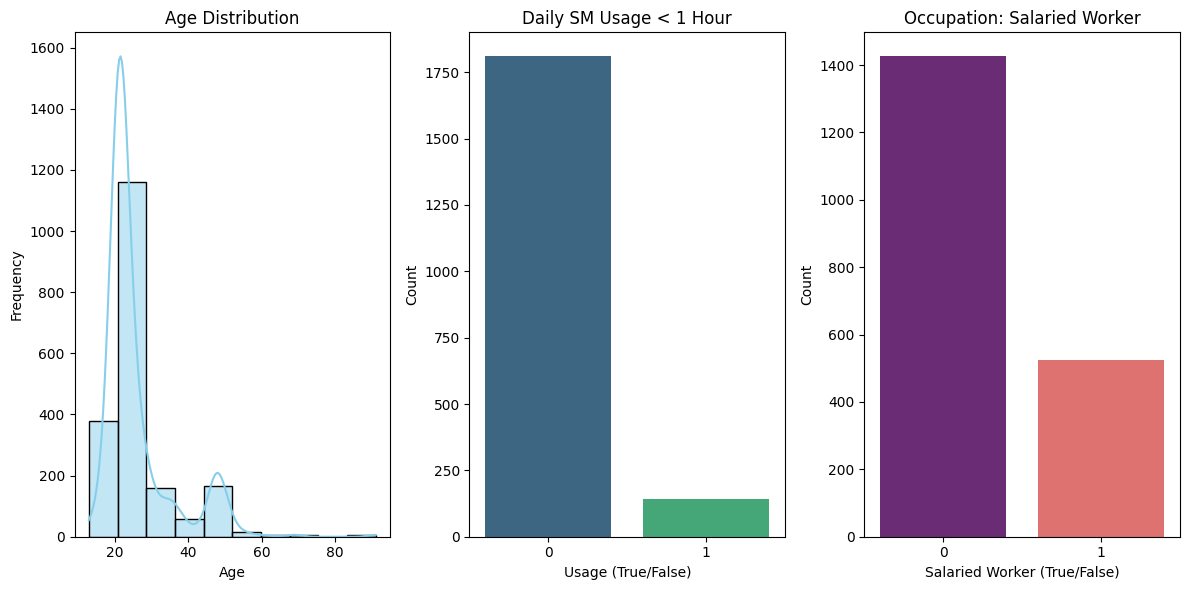

In [541]:
# Create a DataFrame with the required features
plot_df = df[['Age', 'Daily_SM_Usage_Less than an Hour', 'Occupation_Status_Salaried Worker']]

# Plot the data
plt.figure(figsize=(12, 6))

# Plot Age distribution
plt.subplot(1, 3, 1)
sns.histplot(plot_df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot Daily_SM_Usage_Less than an Hour distribution
plt.subplot(1, 3, 2)
sns.countplot(x='Daily_SM_Usage_Less than an Hour', data=plot_df, palette='viridis')
plt.title('Daily SM Usage < 1 Hour')
plt.xlabel('Usage (True/False)')
plt.ylabel('Count')

# Plot Occupation_Status_Salaried Worker distribution
plt.subplot(1, 3, 3)
sns.countplot(x='Occupation_Status_Salaried Worker', data=plot_df, palette='magma')
plt.title('Occupation: Salaried Worker')
plt.xlabel('Salaried Worker (True/False)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


 This section of the code is responsible for creating and visualizing a correlation matrix for key features related to mental health.
 It first identifies the features that are present in the DataFrame and combines them with 'Mental_Status_Numeric' to form the correlation matrix.
 The correlation matrix is then visualized using a heatmap, which displays the correlation coefficients between the features.
 Finally, the correlation matrix is printed to the console for further analysis.


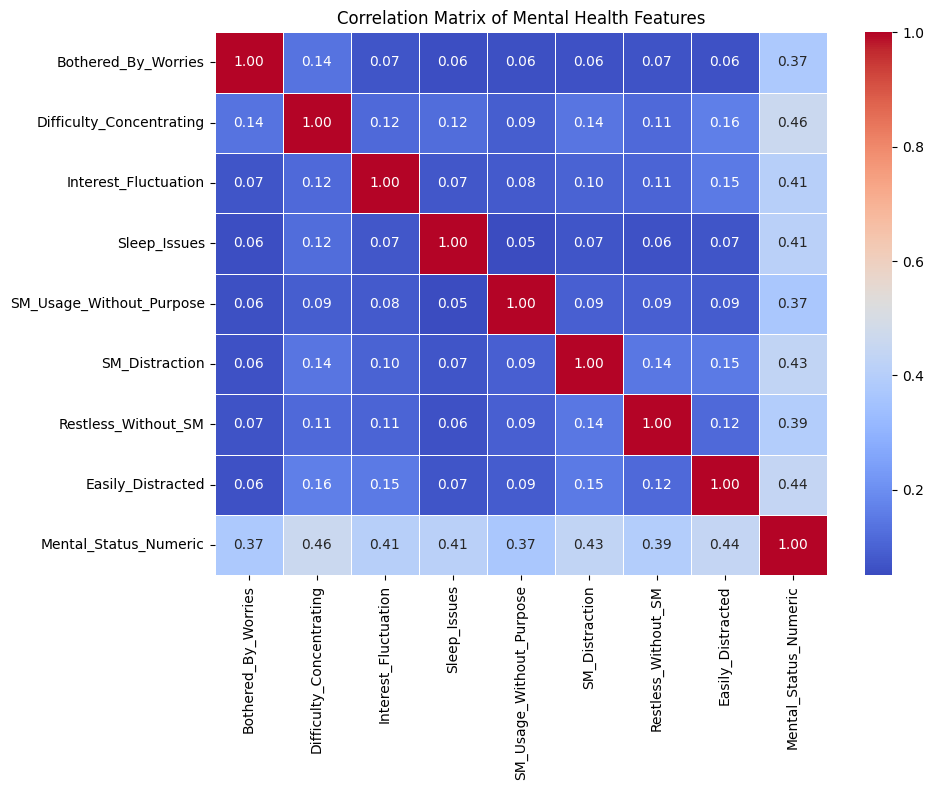


Correlation Matrix of Mental Health Features:
                          Bothered_By_Worries  Difficulty_Concentrating  \
Bothered_By_Worries                  1.000000                  0.138915   
Difficulty_Concentrating             0.138915                  1.000000   
Interest_Fluctuation                 0.070402                  0.116905   
Sleep_Issues                         0.055694                  0.124457   
SM_Usage_Without_Purpose             0.058746                  0.090726   
SM_Distraction                       0.063304                  0.141471   
Restless_Without_SM                  0.068073                  0.113825   
Easily_Distracted                    0.064402                  0.163866   
Mental_Status_Numeric                0.374649                  0.460620   

                          Interest_Fluctuation  Sleep_Issues  \
Bothered_By_Worries                   0.070402      0.055694   
Difficulty_Concentrating              0.116905      0.124457   
Interest_F

In [542]:
# Create a correlation matrix for key features related to mental health
# Get the list of features that actually exist in the dataframe
available_features = [f for f in mental_health_features if f in df.columns]
correlation_features = available_features + ['Mental_Status_Numeric']

# Create the correlation matrix with only available features
correlation_matrix = df[correlation_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Mental Health Features')
plt.tight_layout()
plt.show()

# Display the correlation matrix
print("\nCorrelation Matrix of Mental Health Features:")
print(correlation_matrix)



This section of the code is responsible for visualizing the relationship between various features and the 'Mental_Status_Numeric'.
 It begins by defining a list of features that are to be plotted against 'Mental_Status_Numeric'.
A figure is set up to accommodate multiple subplots, each representing a different feature.
The code iterates over the list of features, creating a bar plot for each one, with 'Mental_Status_Numeric' on the y-axis.
 The plots are arranged in a 3x3 grid, and each subplot is titled according to the feature it represents.
 Finally, the layout is adjusted for better readability, and the plots are displayed.




C:\Users\User\AppData\Local\Temp\ipykernel_17564\3066958104.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=mapped_values, palette='viridis', order=severity_mapping.values())
C:\Users\User\AppData\Local\Temp\ipykernel_17564\3066958104.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=mapped_values, palette='viridis', order=severity_mapping.values())
C:\Users\User\AppData\Local\Temp\ipykernel_17564\3066958104.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=mapped_values, palette='viridis', order=severity_mapping.value

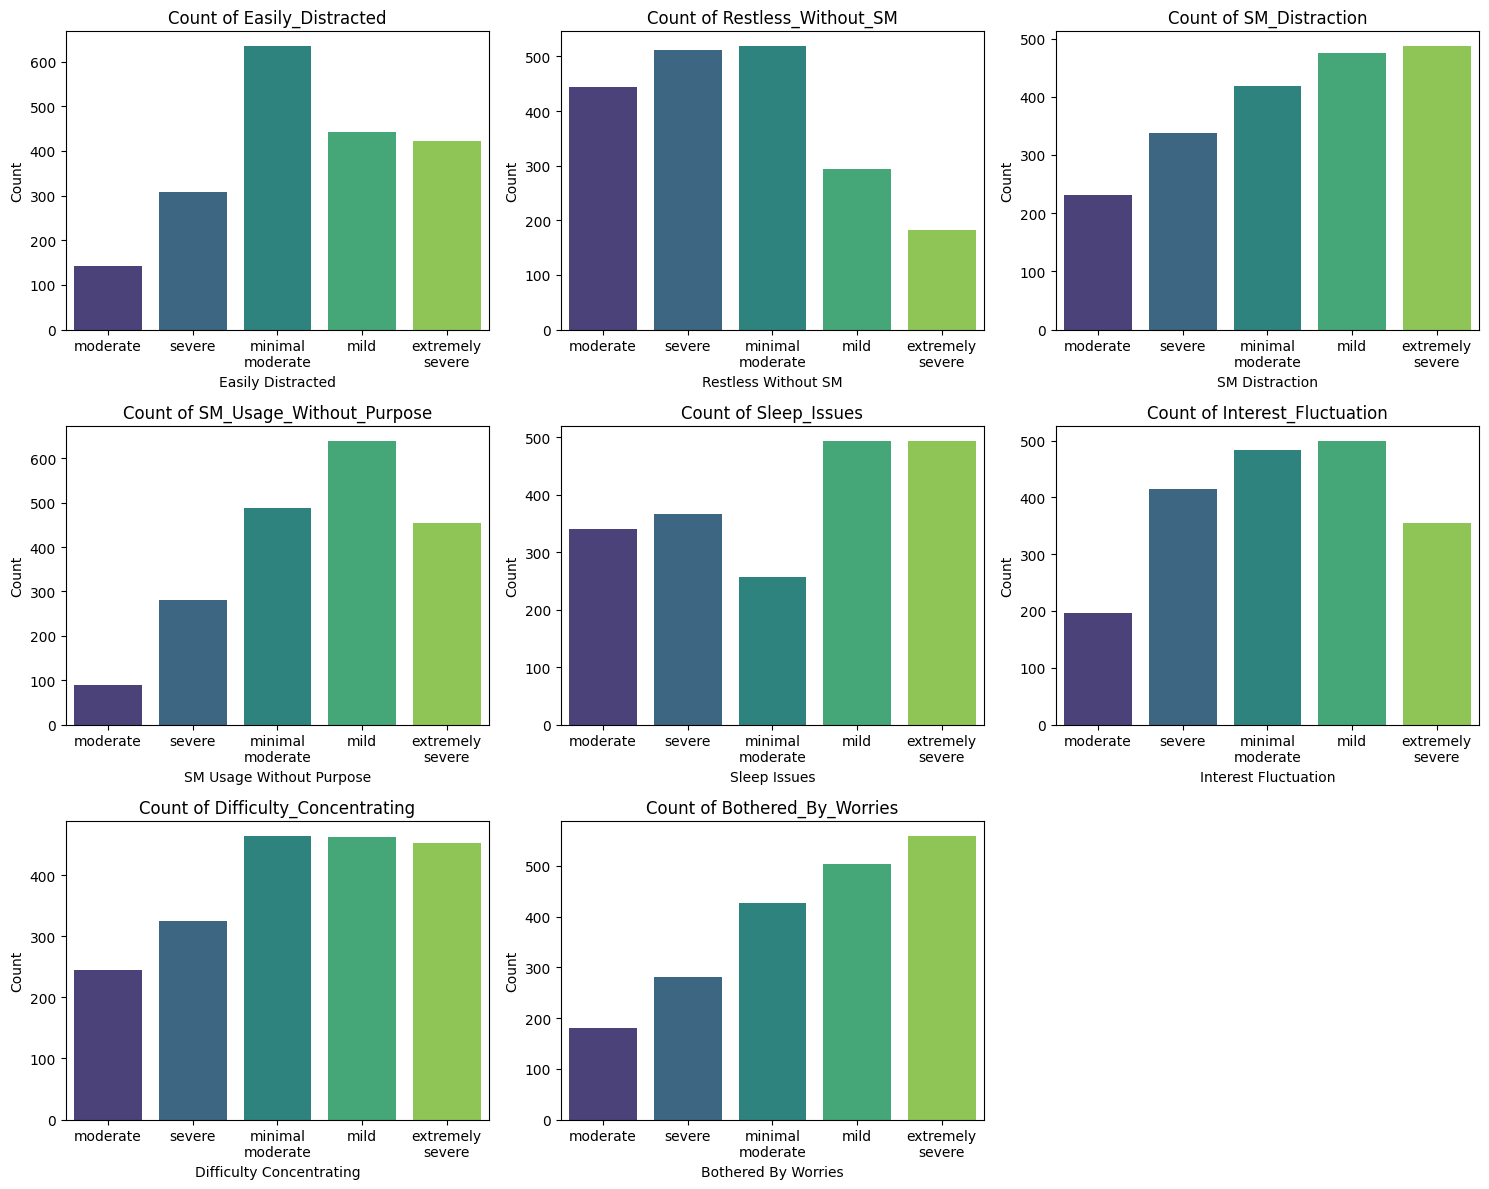

In [543]:
# Create a list of features to plot against Mental_Status_Numeric
features_to_plot = [
    'Easily_Distracted', 'Restless_Without_SM', 'SM_Distraction', 
    'SM_Usage_Without_Purpose', 'Sleep_Issues', 'Interest_Fluctuation', 
    'Difficulty_Concentrating', 'Bothered_By_Worries'
]

# Define a mapping from numbers to descriptive categories
severity_mapping = {
    1: 'moderate',
    2: 'severe',
    3: 'minimal\nmoderate',  # Add newline for better spacing
    4: 'mild',
    5: 'extremely\nsevere'   # Add newline for better spacing
}

# Set up the figure for subplots
plt.figure(figsize=(15, 12))

# Loop through each feature and create a subplot
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    # Map the feature values to the descriptive categories
    mapped_values = df[feature].map(severity_mapping)
    sns.countplot(x=mapped_values, palette='viridis', order=severity_mapping.values())
    plt.title(f'Count of {feature}')
    plt.xlabel(feature.replace('_', ' '))  # Replace underscores with spaces for better readability
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


 This section of the code calculates the correlation between 'Mental_Status_Numeric' and all other features in the DataFrame.
 It iterates over each column, excluding 'Mental_Status' and 'Mental_Status_Numeric', and computes the correlation coefficient.
 Only non-NaN correlations are stored in a dictionary.
 The correlations are then converted into a DataFrame, sorted by the absolute value of the correlation, and displayed.
 Finally, the top 15 correlations are visualized using a horizontal bar plot.



Correlations with Mental Status (sorted by absolute value):
                                               Feature  Correlation
6                             Difficulty_Concentrating     0.460620
4                                    Easily_Distracted     0.441855
2                                       SM_Distraction     0.434825
12                                        Sleep_Issues     0.410940
11                                Interest_Fluctuation     0.406291
..                                                 ...          ...
90   Common_Platforms_Facebook, Instagram, YouTube,...     0.000679
150         Common_Platforms_Facebook, YouTube, Reddit    -0.000330
161  Common_Platforms_Instagram, YouTube, Discord, ...    -0.000233
36                                  Gender_Non binary     -0.000233
168  Common_Platforms_Instagram, YouTube, Snapchat,...    -0.000233

[201 rows x 2 columns]


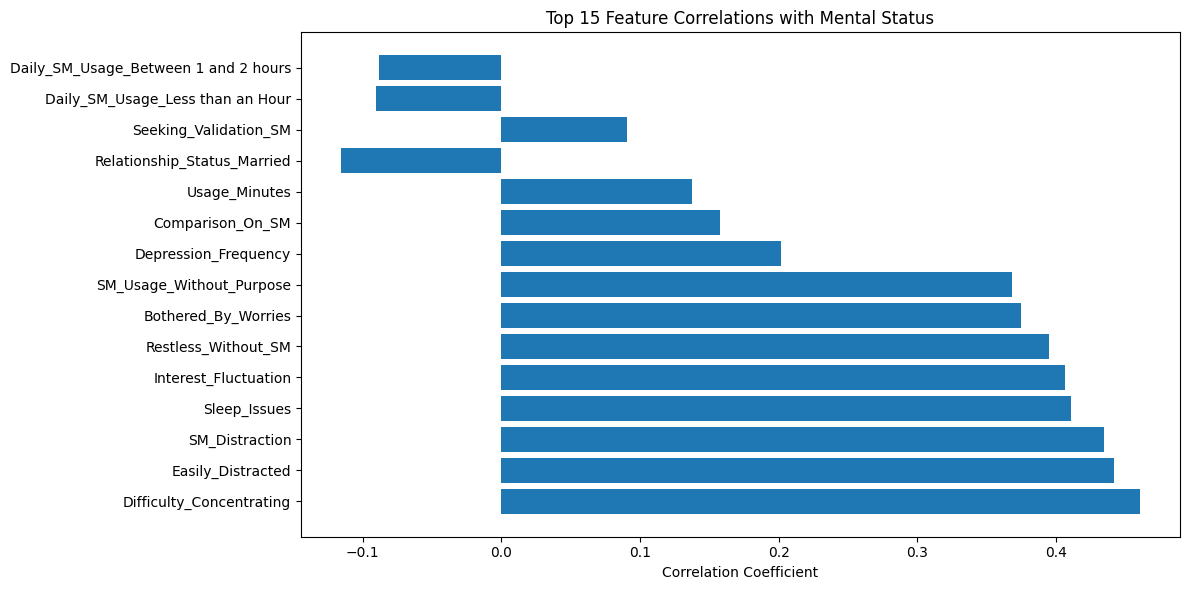

In [544]:
# Calculate correlations between Mental_Status_Numeric and all other features
correlations = {}
for column in df.columns:
    if column not in ['Mental_Status', 'Mental_Status_Numeric']:
        try:
            corr = df['Mental_Status_Numeric'].corr(df[column])
            if not pd.isna(corr):  # Only include non-NaN correlations
                correlations[column] = corr
        except:
            continue

# Convert to DataFrame and sort by absolute correlation value
corr_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values('Abs_Correlation', ascending=False)
corr_df = corr_df.drop('Abs_Correlation', axis=1)

# Display top correlations
print("\nCorrelations with Mental Status (sorted by absolute value):")
print(corr_df)

# Visualize top 15 correlations
plt.figure(figsize=(12, 6))
top_15 = corr_df.head(15)
plt.barh(top_15['Feature'], top_15['Correlation'])
plt.title('Top 15 Feature Correlations with Mental Status')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()




 In this section, we build a predictive model to classify mental health status based on the features we've analyzed.
 
 We:
 1. Prepare our features (X) and target variable (y)
 2. Split the data into training (80%) and testing (20%) sets
 3. Train a Random Forest Classifier on the data
 4. Evaluate model performance using classification metrics and confusion matrix
 5. Analyze feature importance to understand which factors most strongly predict mental health outcomes

 This model helps us understand the predictive relationship between social media usage patterns and mental health status.


In [545]:
# Prepare features and target
X = df.drop(['Mental_Status', 'Mental_Status_Numeric'], axis=1)
y = df['Mental_Status_Numeric']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1560, 203)
Testing set shape: (391, 203)


 Random Forest Classifier for Mental Health Status Prediction
 
 In this section, we implement a Random Forest Classifier to predict mental health status based on our features.
 
 The model:
 1. Uses 100 decision trees (n_estimators=100)
 2. Maintains reproducibility with random_state=42
 3. Is trained on 80% of our data and tested on the remaining 20%
 
 We evaluate the model using:
- Classification report (precision, recall, f1-score)
- Confusion matrix visualization
 - Feature importance analysis to identify the most predictive factors

 This helps us understand which social media usage patterns and behaviors are most strongly associated with different mental health outcomes.



Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.50      0.13      0.20        39
           3       0.71      1.00      0.83       226
           4       0.84      0.47      0.60       111
           5       1.00      0.10      0.18        10

    accuracy                           0.72       391
   macro avg       0.61      0.34      0.36       391
weighted avg       0.72      0.72      0.67       391



d:\ML_ASIF_OWN PROJCET\Asif\Social_Media_Addiction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_ASIF_OWN PROJCET\Asif\Social_Media_Addiction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_ASIF_OWN PROJCET\Asif\Social_Media_Addiction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

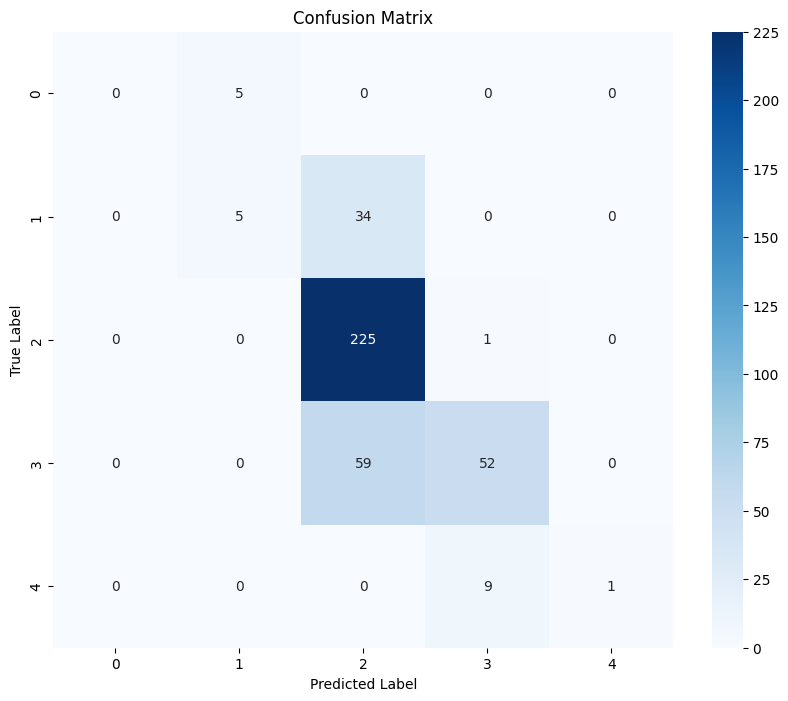

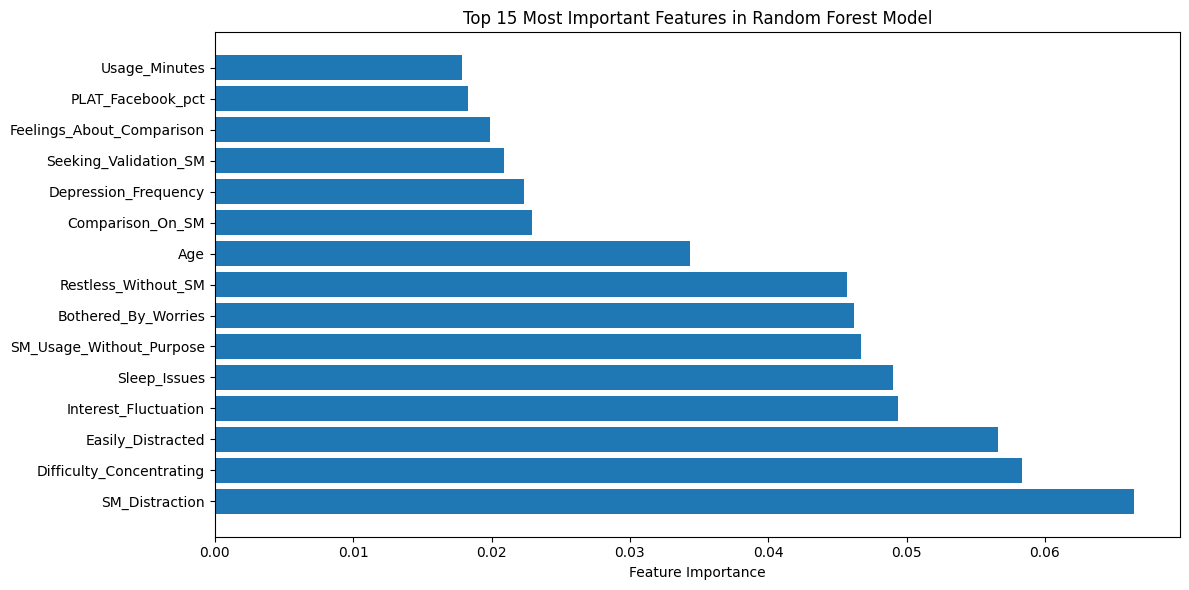

In [546]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert categorical variables to numeric using one-hot encoding
X_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align the train and test data to ensure they have the same columns
X_train_aligned, X_test_aligned = X_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=44)
rf_model.fit(X_train_aligned, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_aligned)

# Print model performance metrics
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train_aligned.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(12, 6))
plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
plt.title('Top 15 Most Important Features in Random Forest Model')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()


 Decision Tree Classifier Analysis
 
 Decision trees are a non-parametric supervised learning method used for classification and regression. The model creates a tree-like structure of decisions based on feature values to predict the target variable. Decision trees are easy to interpret and can handle both numerical and categorical data.
 
 In this section, we'll train a Decision Tree model to predict mental health status based on social media usage patterns and analyze which features are most important for the classification. Decision trees can capture non-linear relationships and feature interactions that might be missed by simpler models.



Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.51      0.54      0.53        39
           3       0.77      0.81      0.79       226
           4       0.71      0.64      0.67       111
           5       0.78      0.70      0.74        10

    accuracy                           0.73       391
   macro avg       0.71      0.70      0.70       391
weighted avg       0.73      0.73      0.73       391



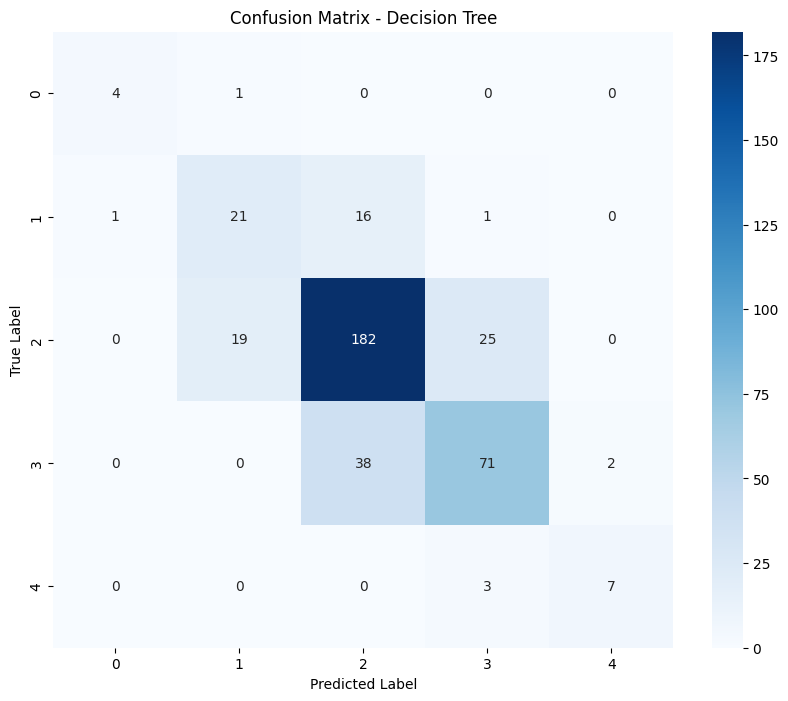

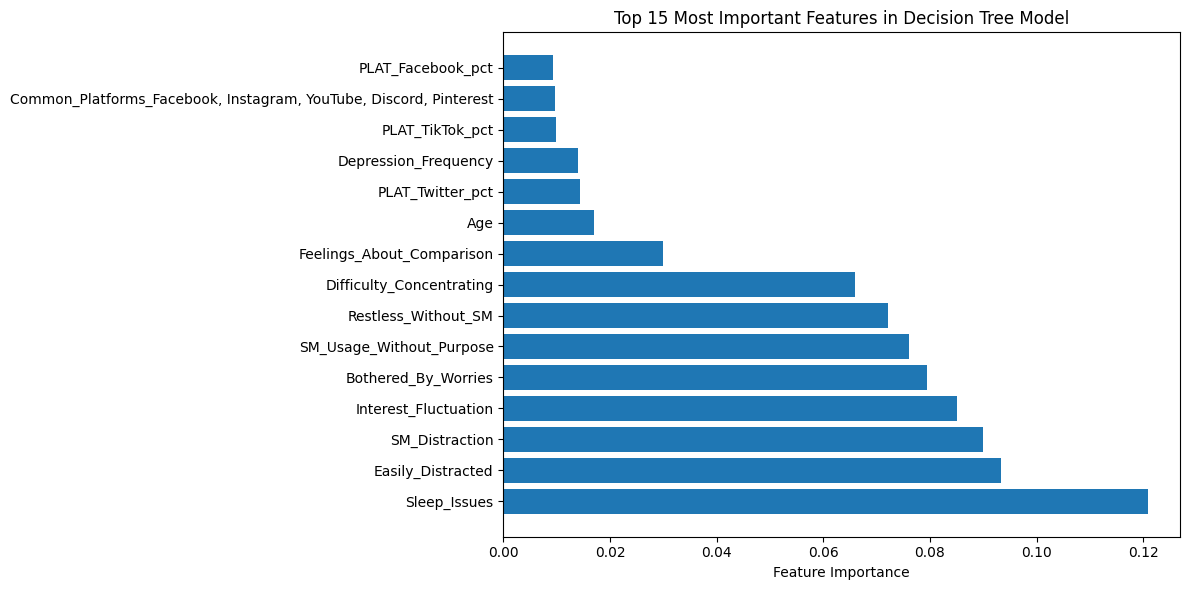

In [547]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Ensure all categorical variables are converted to numerical
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align the train and test data to ensure they have the same columns
X_train_aligned, X_test_aligned = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_aligned, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_aligned)

# Print model performance metrics
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Create confusion matrix
plt.figure(figsize=(10, 8))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Get feature importance
feature_importance_dt = pd.DataFrame({
    'feature': X_train_aligned.columns,
    'importance': dt_model.feature_importances_
})
feature_importance_dt = feature_importance_dt.sort_values('importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_dt['feature'][:15], feature_importance_dt['importance'][:15])
plt.title('Top 15 Most Important Features in Decision Tree Model')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()


 In this section, we'll train a K-Nearest Neighbors (KNN) model to predict mental health status based on social media usage patterns. KNN is a non-parametric method that classifies data points based on the majority class of their k nearest neighbors in the feature space. This approach can be effective for capturing complex relationships in the data without making assumptions about the underlying distribution.



K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        39
           3       0.60      0.85      0.70       226
           4       0.40      0.23      0.30       111
           5       0.00      0.00      0.00        10

    accuracy                           0.56       391
   macro avg       0.20      0.22      0.20       391
weighted avg       0.46      0.56      0.49       391



d:\ML_ASIF_OWN PROJCET\Asif\Social_Media_Addiction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_ASIF_OWN PROJCET\Asif\Social_Media_Addiction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_ASIF_OWN PROJCET\Asif\Social_Media_Addiction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

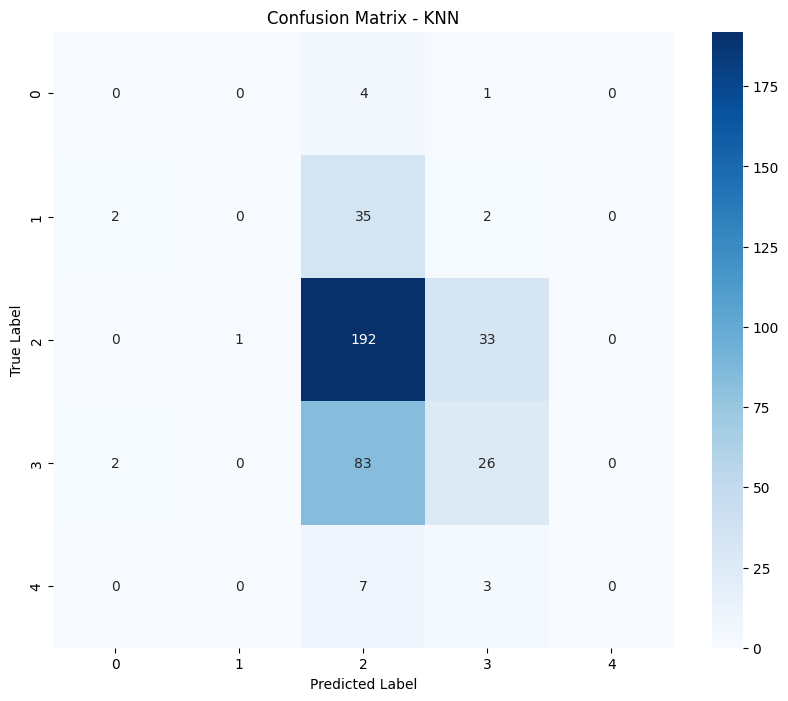

In [548]:
# Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Ensure the test data is encoded similarly to the training data
X_test_encoded = pd.get_dummies(X_test)

# Align the train and test data to ensure they have the same columns
X_train_aligned, X_test_aligned = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_aligned, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_aligned)

# Print model performance metrics
print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Create confusion matrix
plt.figure(figsize=(10, 8))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


 Logistic Regression Model
 In this section, we'll train a Logistic Regression model to predict mental health status based on social media usage patterns. Logistic Regression is a statistical method for binary classification that models the probability of a binary outcome based on one or more predictor variables.
 
 Logistic Regression works by applying the logistic function to a linear combination of features, which transforms the output to a probability between 0 and 1. This makes it well-suited for classification tasks. The model's coefficients can be interpreted as the log-odds of the target variable, providing insights into how each feature affects the prediction.
 
 We'll evaluate the model's performance using classification metrics and visualize the confusion matrix to understand prediction errors. Additionally, we'll examine feature importance to identify which social media usage patterns are most predictive of mental health status.


d:\ML_ASIF_OWN PROJCET\Asif\Social_Media_Addiction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.40      0.36         5
           2       0.88      0.77      0.82        39
           3       0.97      0.99      0.98       226
           4       0.92      0.98      0.95       111
           5       0.50      0.10      0.17        10

    accuracy                           0.94       391
   macro avg       0.72      0.65      0.66       391
weighted avg       0.93      0.94      0.93       391



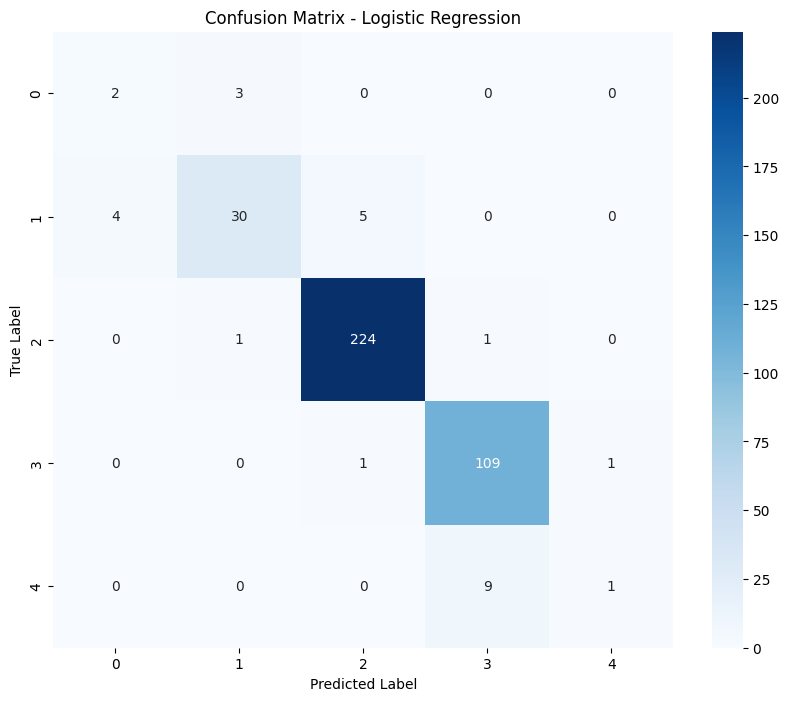

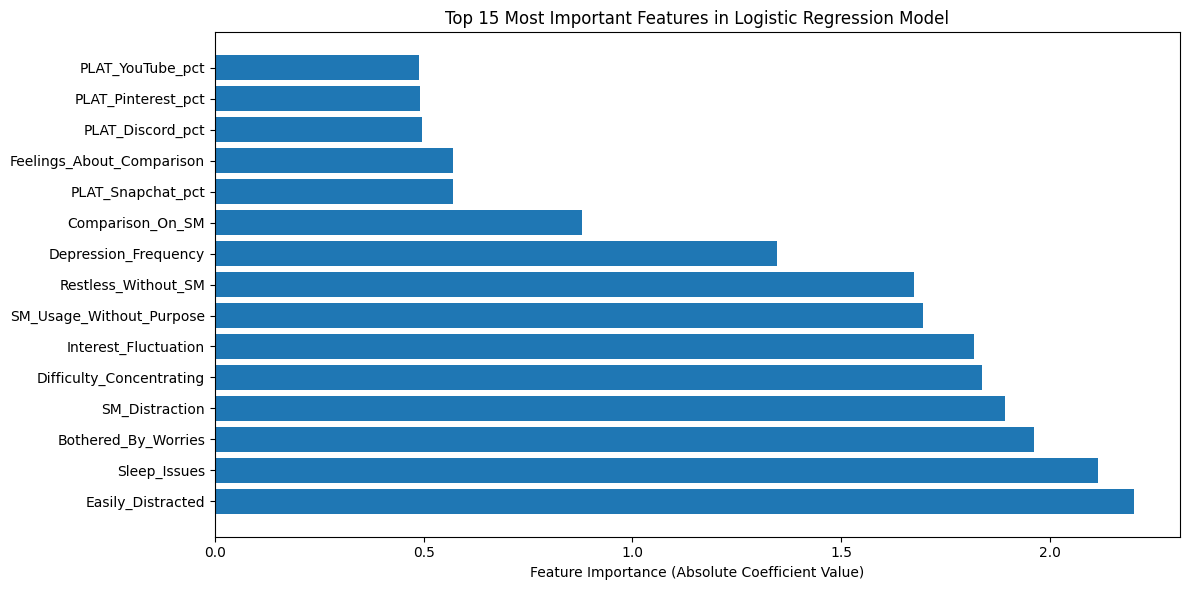

In [549]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Ensure the training data is encoded
X_train_encoded = pd.get_dummies(X_train)

# Align the train and test data to ensure they have the same columns
X_train_aligned, X_test_aligned = X_train_encoded.align(pd.get_dummies(X_test), join='left', axis=1, fill_value=0)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_aligned, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_aligned)

# Print model performance metrics
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Create confusion matrix
plt.figure(figsize=(10, 8))
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Get feature importance for Logistic Regression
feature_importance_lr = pd.DataFrame({
    'feature': X_train_aligned.columns,
    'importance': abs(lr_model.coef_[0])
})
feature_importance_lr = feature_importance_lr.sort_values('importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_lr['feature'][:15], feature_importance_lr['importance'][:15])
plt.title('Top 15 Most Important Features in Logistic Regression Model')
plt.xlabel('Feature Importance (Absolute Coefficient Value)')
plt.tight_layout()
plt.show()


In [550]:
confusion_matrix(y_test, y_pred_lr)

array([[  2,   3,   0,   0,   0],
       [  4,  30,   5,   0,   0],
       [  0,   1, 224,   1,   0],
       [  0,   0,   1, 109,   1],
       [  0,   0,   0,   9,   1]])

## xgboost

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       0.83      0.49      0.61        39
           3       0.86      0.99      0.92       226
           4       0.94      0.84      0.89       111
           5       1.00      0.50      0.67        10

    accuracy                           0.88       391
   macro avg       0.86      0.64      0.72       391
weighted avg       0.88      0.88      0.87       391



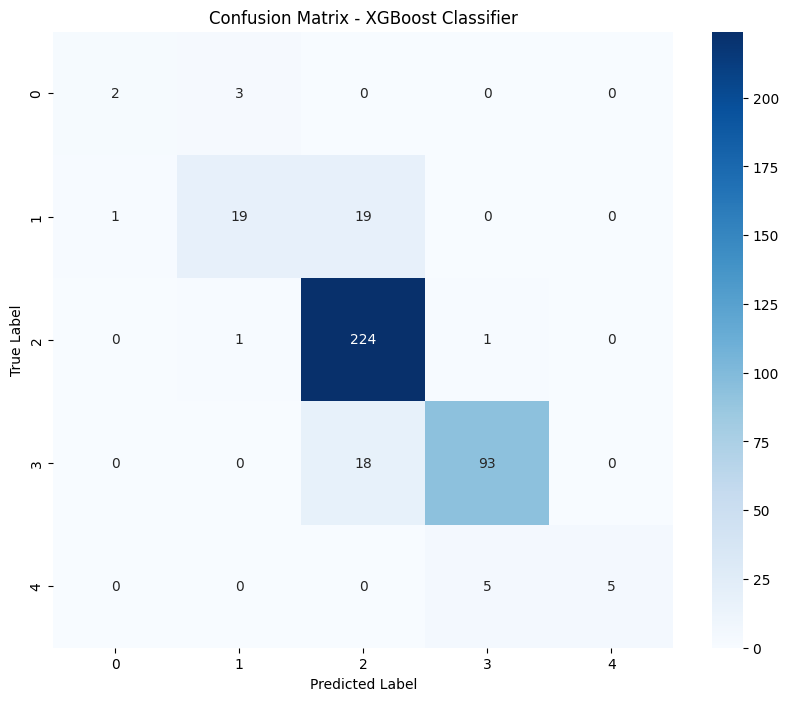

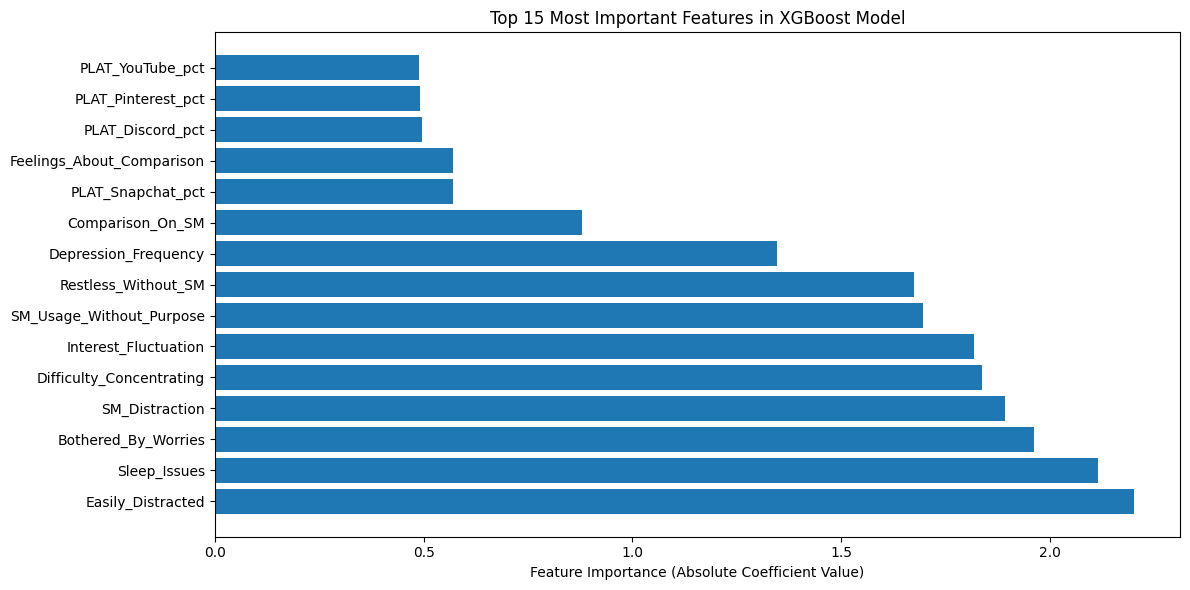

In [551]:
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Convert categorical features to numerical if necessary
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Assuming 'Gender_Clean' and 'Usage_Category' are the problematic columns
X_train_encoded['Gender_Clean'] = X_train_encoded['Gender_Clean'].astype('category').cat.codes
X_test_encoded['Gender_Clean'] = X_test_encoded['Gender_Clean'].astype('category').cat.codes
X_train_encoded['Usage_Category'] = X_train_encoded['Usage_Category'].astype('category').cat.codes
X_test_encoded['Usage_Category'] = X_test_encoded['Usage_Category'].astype('category').cat.codes

# Define xgb_clf if not already defined
xgb_clf = XGBClassifier(max_depth=1, random_state=64, enable_categorical=True)
xgb_clf.fit(X_train_encoded, y_train_encoded)

y_pred_encoded = xgb_clf.predict(X_test_encoded)
y_pred = le.inverse_transform(y_pred_encoded)

print("Classification Report for XGBoost Classifier:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

feature_importance_lr = pd.DataFrame({
    'feature': X_train_aligned.columns,
    'importance': abs(lr_model.coef_[0])
})
feature_importance_lr = feature_importance_lr.sort_values('importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_lr['feature'][:15], feature_importance_lr['importance'][:15])
plt.title('Top 15 Most Important Features in XGBoost Model')
plt.xlabel('Feature Importance (Absolute Coefficient Value)')
plt.tight_layout()
plt.show()

In [555]:
# Gradient Boosting
print("1. Training Gradient Boosting...")

# Assuming X_train and X_test need to be scaled
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

gb_model = GradientBoostingClassifier(
    n_estimators=200, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42
)
gb_model.fit(X_train_scaled, y_train_encoded)
y_pred_gb_encoded = gb_model.predict(X_test_scaled)
y_pred_gb = le.inverse_transform(y_pred_gb_encoded)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

1. Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8645

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.40      0.44         5
           2       0.86      0.62      0.72        39
           3       0.86      0.96      0.91       226
           4       0.88      0.81      0.85       111
           5       1.00      0.40      0.57        10

    accuracy                           0.86       391
   macro avg       0.82      0.64      0.70       391
weighted avg       0.87      0.86      0.86       391



# Save the Model
 
 In this section, we'll save our trained Logistic Regression model to a file using joblib.
 This allows us to later load the model for making predictions without having to retrain it.
The model will be saved as 'model.joblib' in the current directory.


In [ ]:
# Save the best model (Logistic Regression) and preprocessor
import joblib

# Save the model and preprocessor
joblib.dump(lr_model, 'model.joblib')

print("Model and preprocessor saved successfully!")


Model and preprocessor saved successfully!


In [ ]:
# Ensemble Method: Combining Logistic Regression, XGBoost, and Gradient Boosting
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Creating Ensemble Model...")

# Prepare data for ensemble (using the same preprocessing as before)
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
X_train_aligned, X_test_aligned = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Scale the data for better performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_aligned)
X_test_scaled = scaler.transform(X_test_aligned)

# Create individual models
lr_model = LogisticRegression(random_state=42, max_iter=2000)
xgb_model = XGBClassifier(random_state=42, max_depth=3, n_estimators=100)
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=3)

# Create ensemble using VotingClassifier with soft voting
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('xgb', xgb_model),
        ('gb', gb_model)
    ],
    voting='soft'  # Use soft voting for better performance
)

# Train the ensemble model
print("Training Ensemble Model...")
ensemble_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Calculate accuracy
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")

print("\nEnsemble Model created successfully!")


In [ ]:
# Classification Report for Ensemble Model
print("="*60)
print("ENSEMBLE MODEL CLASSIFICATION REPORT")
print("="*60)

# Generate classification report
class_report = classification_report(y_test, y_pred_ensemble, target_names=['Mild', 'Minimal Moderate', 'Moderate', 'Severe', 'Extremely Severe'])
print(class_report)

# Additional metrics
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_ensemble, average='weighted')

print(f"\nWeighted Average Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Support: {support:.0f}")

# Individual model comparison
print("\n" + "="*60)
print("INDIVIDUAL MODEL COMPARISON")
print("="*60)

# Train individual models for comparison
lr_individual = LogisticRegression(random_state=42, max_iter=2000)
xgb_individual = XGBClassifier(random_state=42, max_depth=3, n_estimators=100)
gb_individual = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=3)

models = {
    'Logistic Regression': lr_individual,
    'XGBoost': xgb_individual,
    'Gradient Boosting': gb_individual
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

print(f"\nEnsemble Model Accuracy: {ensemble_accuracy:.4f}")
print("="*60)


In [ ]:
# Confusion Matrix for Ensemble Model
print("Creating Confusion Matrix for Ensemble Model...")

# Create confusion matrix
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Create a more detailed confusion matrix visualization
plt.figure(figsize=(12, 8))

# Create subplot for confusion matrix
plt.subplot(2, 2, 1)
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Mild', 'Minimal Moderate', 'Moderate', 'Severe', 'Extremely Severe'],
            yticklabels=['Mild', 'Minimal Moderate', 'Moderate', 'Severe', 'Extremely Severe'])
plt.title('Ensemble Model Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Create normalized confusion matrix
plt.subplot(2, 2, 2)
cm_normalized = cm_ensemble.astype('float') / cm_ensemble.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Mild', 'Minimal Moderate', 'Moderate', 'Severe', 'Extremely Severe'],
            yticklabels=['Mild', 'Minimal Moderate', 'Moderate', 'Severe', 'Extremely Severe'])
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Create accuracy by class
plt.subplot(2, 2, 3)
class_accuracy = cm_ensemble.diagonal() / cm_ensemble.sum(axis=1)
classes = ['Mild', 'Minimal Moderate', 'Moderate', 'Severe', 'Extremely Severe']
bars = plt.bar(classes, class_accuracy, color=['lightcoral', 'lightblue', 'lightgreen', 'orange', 'purple'])
plt.title('Accuracy by Class')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add accuracy values on bars
for bar, acc in zip(bars, class_accuracy):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# Create prediction distribution
plt.subplot(2, 2, 4)
pred_counts = pd.Series(y_pred_ensemble).value_counts().sort_index()
true_counts = pd.Series(y_test).value_counts().sort_index()
x = np.arange(len(classes))
width = 0.35

plt.bar(x - width/2, true_counts.values, width, label='True', alpha=0.8, color='skyblue')
plt.bar(x + width/2, pred_counts.values, width, label='Predicted', alpha=0.8, color='lightcoral')
plt.title('True vs Predicted Distribution')
plt.ylabel('Count')
plt.xticks(x, classes, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Print confusion matrix details
print("\nConfusion Matrix Details:")
print("="*50)
print("Rows: True Labels, Columns: Predicted Labels")
print("\nClass Labels:")
for i, label in enumerate(classes):
    print(f"{i+1}: {label}")

print(f"\nTotal Predictions: {cm_ensemble.sum()}")
print(f"Correct Predictions: {cm_ensemble.diagonal().sum()}")
print(f"Overall Accuracy: {cm_ensemble.diagonal().sum() / cm_ensemble.sum():.4f}")

# Per-class metrics
print("\nPer-Class Metrics:")
print("-" * 50)
for i, label in enumerate(classes):
    true_pos = cm_ensemble[i, i]
    false_pos = cm_ensemble[:, i].sum() - true_pos
    false_neg = cm_ensemble[i, :].sum() - true_pos
    precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
    recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"{label}:")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall: {recall:.3f}")
    print(f"  F1-Score: {f1:.3f}")
    print()


In [ ]:
# Plot top 15 most important features from ensemble model
print("Analyzing Feature Importance from Ensemble Model...")

# Get feature importance from each model in the ensemble
feature_names = X_train_aligned.columns

# Extract feature importance from each model
lr_importance = np.abs(ensemble_model.estimators_[0].coef_[0])  # Logistic Regression coefficients
xgb_importance = ensemble_model.estimators_[1].feature_importances_  # XGBoost feature importance
gb_importance = ensemble_model.estimators_[2].feature_importances_  # Gradient Boosting feature importance

# Create a comprehensive feature importance analysis
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Logistic_Regression': lr_importance,
    'XGBoost': xgb_importance,
    'Gradient_Boosting': gb_importance
})

# Calculate ensemble importance (average of normalized importances)
# Normalize each model's importance to 0-1 scale
for col in ['Logistic_Regression', 'XGBoost', 'Gradient_Boosting']:
    feature_importance_df[f'{col}_normalized'] = (
        feature_importance_df[col] - feature_importance_df[col].min()
    ) / (feature_importance_df[col].max() - feature_importance_df[col].min())

# Calculate ensemble importance as average of normalized importances
feature_importance_df['Ensemble_Importance'] = (
    feature_importance_df['Logistic_Regression_normalized'] + 
    feature_importance_df['XGBoost_normalized'] + 
    feature_importance_df['Gradient_Boosting_normalized']
) / 3

# Sort by ensemble importance
feature_importance_df = feature_importance_df.sort_values('Ensemble_Importance', ascending=False)

# Create comprehensive visualization
plt.figure(figsize=(16, 12))

# Plot 1: Top 15 features from ensemble
plt.subplot(2, 2, 1)
top_15_ensemble = feature_importance_df.head(15)
bars1 = plt.barh(range(len(top_15_ensemble)), top_15_ensemble['Ensemble_Importance'], 
                 color='steelblue', alpha=0.8)
plt.yticks(range(len(top_15_ensemble)), top_15_ensemble['Feature'])
plt.xlabel('Ensemble Importance Score')
plt.title('Top 15 Most Important Features (Ensemble)')
plt.gca().invert_yaxis()

# Add value labels on bars
for i, bar in enumerate(bars1):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontsize=8)

# Plot 2: Individual model importances for top 10 features
plt.subplot(2, 2, 2)
top_10_features = feature_importance_df.head(10)
x = np.arange(len(top_10_features))
width = 0.25

plt.bar(x - width, top_10_features['Logistic_Regression_normalized'], width, 
        label='Logistic Regression', alpha=0.8, color='lightcoral')
plt.bar(x, top_10_features['XGBoost_normalized'], width, 
        label='XGBoost', alpha=0.8, color='lightgreen')
plt.bar(x + width, top_10_features['Gradient_Boosting_normalized'], width, 
        label='Gradient Boosting', alpha=0.8, color='lightblue')

plt.xlabel('Features')
plt.ylabel('Normalized Importance')
plt.title('Feature Importance Comparison (Top 10)')
plt.xticks(x, [f.split('_')[-1] if len(f.split('_')) > 3 else f for f in top_10_features['Feature']], 
           rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Plot 3: Feature importance distribution
plt.subplot(2, 2, 3)
plt.hist(feature_importance_df['Ensemble_Importance'], bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Ensemble Importance Score')
plt.ylabel('Number of Features')
plt.title('Distribution of Feature Importance Scores')
plt.axvline(feature_importance_df['Ensemble_Importance'].mean(), color='red', linestyle='--', 
           label=f'Mean: {feature_importance_df["Ensemble_Importance"].mean():.3f}')
plt.legend()

# Plot 4: Correlation between model importances
plt.subplot(2, 2, 4)
correlation_matrix = feature_importance_df[['Logistic_Regression_normalized', 
                                           'XGBoost_normalized', 
                                           'Gradient_Boosting_normalized']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Correlation Between Model Importances')

plt.tight_layout()
plt.show()

# Print detailed feature importance information
print("\n" + "="*80)
print("TOP 15 MOST IMPORTANT FEATURES (ENSEMBLE MODEL)")
print("="*80)

for i, (_, row) in enumerate(top_15_ensemble.iterrows(), 1):
    print(f"{i:2d}. {row['Feature']:<50} | Importance: {row['Ensemble_Importance']:.4f}")

print("\n" + "="*80)
print("FEATURE IMPORTANCE STATISTICS")
print("="*80)
print(f"Total Features Analyzed: {len(feature_importance_df)}")
print(f"Mean Importance Score: {feature_importance_df['Ensemble_Importance'].mean():.4f}")
print(f"Std Importance Score: {feature_importance_df['Ensemble_Importance'].std():.4f}")
print(f"Max Importance Score: {feature_importance_df['Ensemble_Importance'].max():.4f}")
print(f"Min Importance Score: {feature_importance_df['Ensemble_Importance'].min():.4f}")

# Top features by individual models
print("\n" + "="*80)
print("TOP 5 FEATURES BY INDIVIDUAL MODELS")
print("="*80)

models = ['Logistic_Regression', 'XGBoost', 'Gradient_Boosting']
for model in models:
    top_5 = feature_importance_df.nlargest(5, f'{model}_normalized')
    print(f"\n{model.replace('_', ' ').title()}:")
    for i, (_, row) in enumerate(top_5.iterrows(), 1):
        print(f"  {i}. {row['Feature']:<40} | Score: {row[f'{model}_normalized']:.4f}")

print("\n" + "="*80)
